In [160]:
# To make maps
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

# To add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 

In [220]:
def get_map(places=["Dhaka District, Dhaka Division, Bangladesh"]):

    G = ox.graph_from_place(places, network_type="all", simplify=True)
    return G

In [221]:
def get_metadata(G):
    map_metadata = []
    for _, _, _, data in G.edges(keys=True, data=True):
        map_metadata.append(data)
    return map_metadata

In [222]:
def set_road_color(map_metadata, color_list):
    road_colors = []

    # The length is in meters
    for item in map_metadata:
        if "length" in item.keys():

            if item["length"] <= 50:
                color = color_list[0]

            elif item["length"] > 50 and item["length"] <= 150:
                color = color_list[1]

            elif item["length"] > 150 and item["length"] <= 250:
                color = color_list[2]

            elif item["length"] > 250 and item["length"] <= 350:
                color = color_list[3]

            else:
                color = color_list[4]

        road_colors.append(color)
    return road_colors

In [174]:
def set_road_width(map_metadata):
    # List to store linewidths
    road_widths = []

    for item in map_metadata:
        if "footway" in item["highway"]:
            linewidth = 1

        else:
            linewidth = 2.5

        road_widths.append(linewidth)
        return road_widths

In [234]:
def draw_map(G, color_list, road_colors, road_widths):
   
    # Center of map
    latitude = 23.7189
    longitude = 90.3882

    # Bbox sides
    north = latitude + 0.025
    south = latitude - 0.025
    east = longitude + 0.050
    west = longitude - 0.050

    # Make Map
    fig, ax = ox.plot_graph(
        G,
        node_size=0,
        bbox=(north, south, east, west),
        margin=0,
        fig_height=40,
        fig_width=40,
        dpi=300,
        bgcolor="#002426",
        save=False,
        edge_color=road_colors,
        edge_linewidth=road_widths,
        edge_alpha=1,
    )

    # Text and marker size
    markersize = 16
    fontsize = 16

    # Add legend
    legend_colors = color_list
    legend_labels = [
        "Length < 50 m",
        "Length between 50-150 m",
        "Length between 150-250 m",
        "Length between 250-350 m",
        "Length > 350 m",
    ]

    legend_elements = [
        Line2D(
            [0],
            [0],
            marker="s",
            color=color,
            label=label,
            markerfacecolor=color,
            markersize=markersize,
        )
        for color, label in zip(legend_colors, legend_labels)
    ]

    l = ax.legend(
        handles=legend_elements,
        bbox_to_anchor=(0.0, 0.0),
        frameon=True,
        ncol=1,
        facecolor="#002426",
        framealpha=0.9,
        loc="lower left",
        fontsize=fontsize,
    )

    # Legend font color
    for text in l.get_texts():
        text.set_color("w")

    # Save figure
    fig.savefig(
        "Dhaka.png",
        dpi=300,
        bbox_inches="tight",
        format="png",
        facecolor=fig.get_facecolor(),
        transparent=True,
    )


In [232]:
if __name__=="__main__":
    G = get_map()
    map_metadata = get_metadata(G)
    

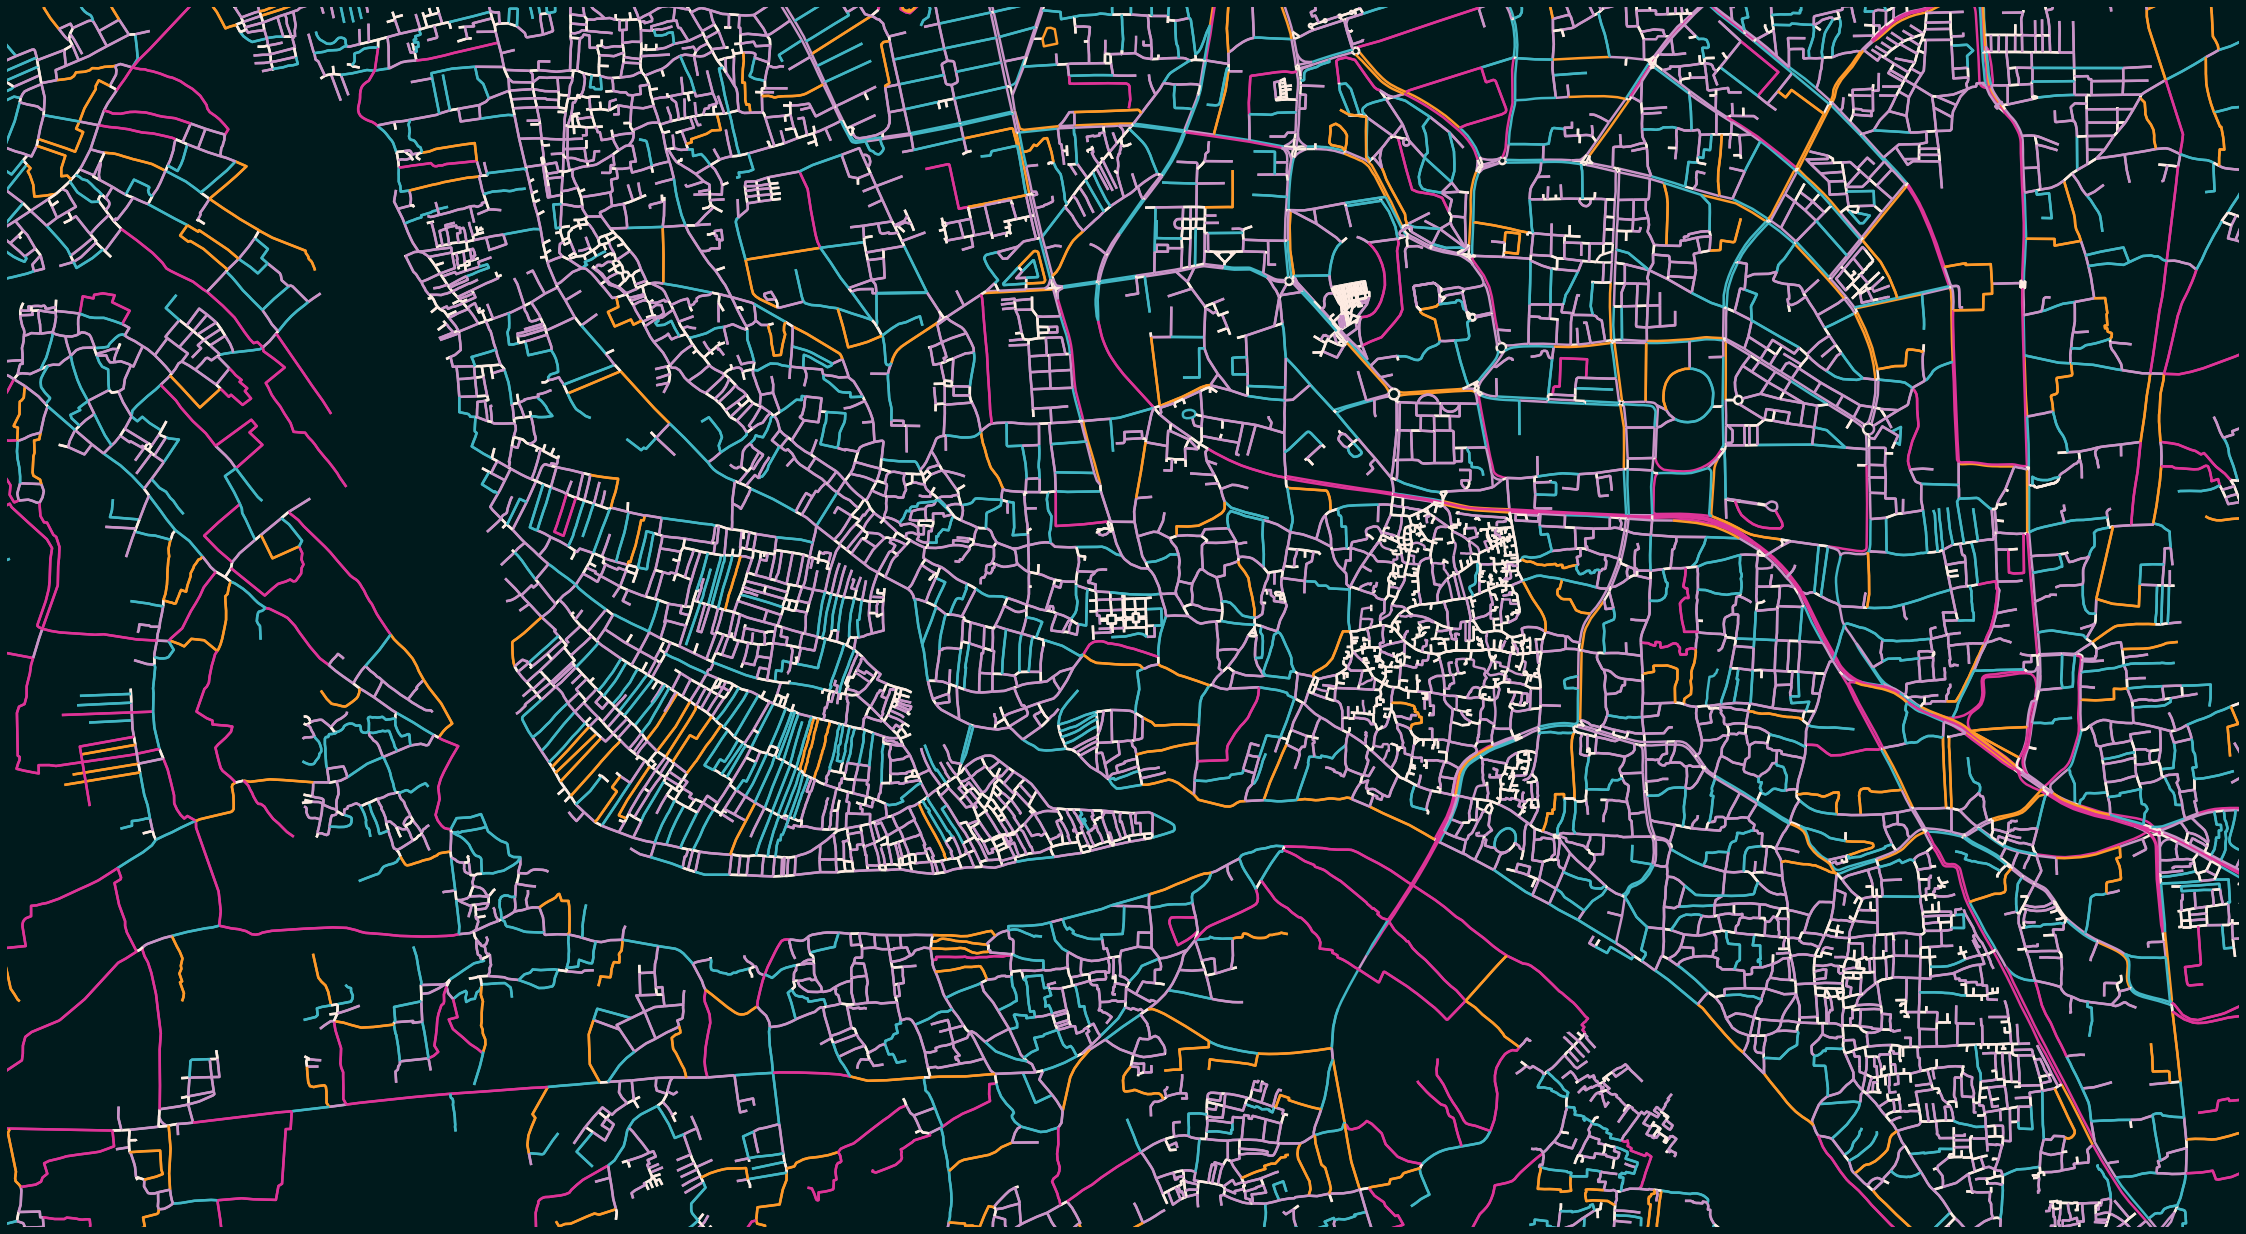

In [233]:
color_list= ['#feebe2','#c994c7','#41b6c4','#fe9929','#dd3497']
road_colors = set_road_color(map_metadata, color_list)
road_widths = set_road_width(map_metadata)
draw_map(G, color_list, road_colors, road_widths)